# **Import Libraries**

In [4]:
# Import libraries
import re
import nltk
import pandas as pd
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt


# **Load Dataset**

In [5]:
# Load dataset
df = pd.read_csv("/content/IMDB Dataset.csv", encoding='ISO-8859-1')

# Display dataset information
print("Dataset Columns:", df.columns)
print("Dataset Preview:\n", df.head())
# **Convert Sentiments**


Dataset Columns: Index(['review', 'sentiment'], dtype='object')
Dataset Preview:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


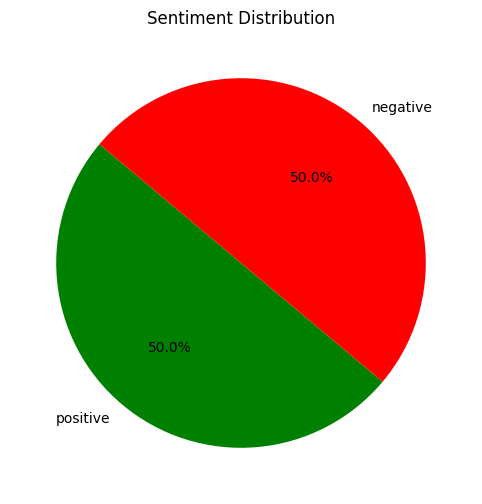

In [6]:
# Count Sentiments
sentiment_counts = df['sentiment'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.show()

# **Download NLTK Resourcest**

In [7]:
# Download NLTK Resources
nltk.download('punkt_tab')         # Tokenizer models
nltk.download('stopwords')         # Stopword list
nltk.download('wordnet')           # WordNet lemmatizer


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Initialize Lemmatizer and Stop Words**

In [8]:
# Initialize Lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


# **Preprocessing Function**

In [9]:
# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(rf"[{string.punctuation}]", " ", text)
    # Remove numbers
    text = re.sub(r'\d+', " ", text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Rejoin tokens into a single string
    return " ".join(tokens)

# Apply preprocessing
df['Cleaned_Review'] = df['review'].apply(preprocess_text)

# Display cleaned data
print(df[['review', 'Cleaned_Review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      Cleaned_Review  
0  one reviewer mentioned watching oz episode hoo...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


# **Train-Test Split**

In [10]:
# Define features (X) and target (y)
X = df['Cleaned_Review']
y = df['sentiment']

# Check class distribution
print(df['sentiment'].value_counts())

# Filter classes with fewer than 5 instances
class_counts = df['sentiment'].value_counts()
valid_classes = class_counts[class_counts >= 5].index
df_filtered = df[df['sentiment'].isin(valid_classes)]

# Split data into training and testing sets
X = df_filtered['Cleaned_Review']
y = df_filtered['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


sentiment
positive    25000
negative    25000
Name: count, dtype: int64
Training Data Shape: (35000,)
Testing Data Shape: (15000,)


# **Vectorize Text Data**

In [11]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)  # Added n-grams and limited features
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)



# **Train Model**

In [12]:
# Initialize Logistic Regression with class balancing
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model
model.fit(X_train_vectorized, y_train)

print("Model Training Completed.")


Model Training Completed.


# **Evaluate Model**

In [13]:
# Make predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 89.44%
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7500
    positive       0.89      0.90      0.90      7500

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

Confusion Matrix:
 [[6631  869]
 [ 715 6785]]


# **Save and Load Model**

In [14]:
# Save the trained model
joblib.dump(model, 'sentiment_model.pkl')
print("Model Saved Successfully.")

# Load the model back
loaded_model = joblib.load('sentiment_model.pkl')
print("Model Loaded Successfully.")


Model Saved Successfully.
Model Loaded Successfully.


# **Test with New Data**

In [15]:
# Test the model with new data
new_text = "Just published a new blog post. Check it out!"
new_text_cleaned = preprocess_text(new_text)

# Vectorize new text
new_text_vectorized = vectorizer.transform([new_text_cleaned])

# Predict sentiment
predicted_sentiment = loaded_model.predict(new_text_vectorized)
print("Predicted Sentiment:", predicted_sentiment[0])


Predicted Sentiment: positive


In [16]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.44%
